About Company
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. The customer first applies for a home loan after that company validates the customer's eligibility for a loan.

Problem
The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling 
out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, 
Loan Amount, Credit History and others. To automate this process, they have given a problem identifying the customer 
segments eligible for loan amounts to target these customers specifically. Here they have provided a partial data set.

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score, ConfusionMatrixDisplay, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
df = pd.read_csv('C:/Users/yahqu/Downloads/loan_sanction_train.csv')
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [116]:
data = df.copy()

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [118]:
data = data.dropna()
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<AxesSubplot: title={'center': 'Data'}, ylabel='None'>

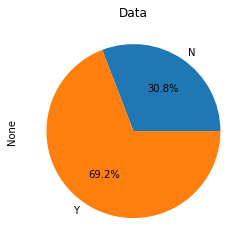

In [119]:
data.groupby('Loan_Status').size().plot(kind='pie', autopct='%1.1f%%', title = "Data")

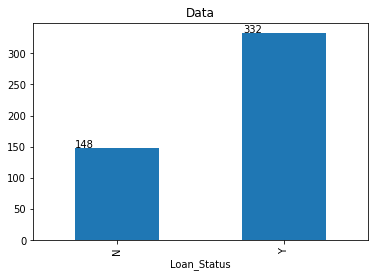

In [120]:
visual_data = data.groupby('Loan_Status').size().plot(kind='bar', title = "Data")
for p in visual_data.patches:
    visual_data.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [121]:
Target_values = data['Loan_Status']
data = data.drop(columns = ['Loan_Status','Loan_ID'])
final_output_colums = data.columns #getting the columns of the dataframe
data 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [122]:
Target_values

1      N
2      Y
3      Y
4      Y
5      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 480, dtype: object

# Encoder for textual columns and target variable.

In [123]:
unique_target_values = Target_values.unique()
Target_encoder = LabelEncoder()
Target_encoder.fit(unique_target_values)
Target_values = Target_encoder.transform(Target_values)
Target_values

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [124]:
encoded_labels = []
categorical_columns = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area']
for i in categorical_columns:
    le = LabelEncoder()
    unique_values = data[i].unique() #getting the unique values of that column
    le.fit(unique_values) #making sure the encoder understands the unique values so it can then be transformed back.
    data[i] = le.transform(data[i].values)
    encoded_labels.append(le)

In [125]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [126]:
x_train,x_test,y_train,y_test = train_test_split(data,Target_values,test_size = 0.25)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(360, 11) (120, 11) (360,) (120,)


# Combine x_test with y_test to see our test values

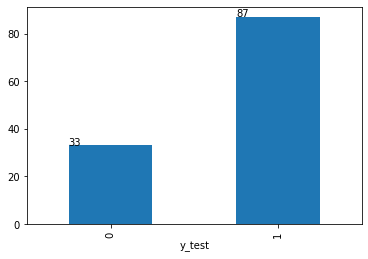

In [137]:
x_test_to_visualize = x_test.copy()
x_test_to_visualize['y_test'] = y_test
groups = x_test_to_visualize.groupby('y_test').size().plot(kind = "bar")
for p in groups.patches:
    groups.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [128]:
model = LogisticRegression(max_iter = 1000)

In [129]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [130]:
predicted_y = model.predict(x_test)
predicted_y 

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [131]:
print("Model Accuracy:", accuracy_score(predicted_y,y_test))
print("r2 score:", r2_score(y_test,predicted_y))
predicted_y

Model Accuracy: 0.8
r2 score: -0.0031347962382444194


array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [132]:
x_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
248,1,1,1,0,0,2882,1843.0,123.0,480.0,1.0,1
159,1,1,0,0,0,4583,5625.0,255.0,360.0,1.0,1
65,1,1,0,0,0,5726,4595.0,258.0,360.0,1.0,1
569,1,1,0,0,0,3166,2064.0,104.0,360.0,0.0,2
109,1,1,3,1,0,2071,754.0,94.0,480.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
200,1,1,1,1,0,2600,2500.0,90.0,360.0,1.0,1
331,1,0,0,0,0,2935,0.0,98.0,360.0,1.0,1
93,1,0,0,0,0,4133,0.0,122.0,360.0,1.0,1
595,1,0,0,1,0,3833,0.0,110.0,360.0,1.0,0


# Now we encode the label back to its original state

Since I used the label encoder to transform the categorical data columns to numbers, now I want to convert it back to its original state.

In [133]:
j = 0
for i in categorical_columns:
    x_test[i] = encoded_labels[j].inverse_transform(x_test[i])
    j = j + 1
x_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
248,Male,Yes,1,Graduate,No,2882,1843.0,123.0,480.0,1.0,Semiurban
159,Male,Yes,0,Graduate,No,4583,5625.0,255.0,360.0,1.0,Semiurban
65,Male,Yes,0,Graduate,No,5726,4595.0,258.0,360.0,1.0,Semiurban
569,Male,Yes,0,Graduate,No,3166,2064.0,104.0,360.0,0.0,Urban
109,Male,Yes,3+,Not Graduate,No,2071,754.0,94.0,480.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
200,Male,Yes,1,Not Graduate,No,2600,2500.0,90.0,360.0,1.0,Semiurban
331,Male,No,0,Graduate,No,2935,0.0,98.0,360.0,1.0,Semiurban
93,Male,No,0,Graduate,No,4133,0.0,122.0,360.0,1.0,Semiurban
595,Male,No,0,Not Graduate,No,3833,0.0,110.0,360.0,1.0,Rural


# Adding the predicteed y values so we know how correct it was. 

In [134]:
x_test['original Loan Status'] = Target_encoder.inverse_transform(y_test)
x_test['Predicted Loan Sataus'] = Target_encoder.inverse_transform(predicted_y)
x_test.head(40)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,original Loan Status,Predicted Loan Sataus
248,Male,Yes,1,Graduate,No,2882,1843.0,123.0,480.0,1.0,Semiurban,Y,Y
159,Male,Yes,0,Graduate,No,4583,5625.0,255.0,360.0,1.0,Semiurban,Y,Y
65,Male,Yes,0,Graduate,No,5726,4595.0,258.0,360.0,1.0,Semiurban,N,Y
569,Male,Yes,0,Graduate,No,3166,2064.0,104.0,360.0,0.0,Urban,N,N
109,Male,Yes,3+,Not Graduate,No,2071,754.0,94.0,480.0,1.0,Semiurban,Y,Y
431,Male,No,0,Graduate,No,6500,0.0,105.0,360.0,0.0,Rural,N,N
302,Female,No,0,Graduate,No,5000,0.0,132.0,360.0,1.0,Rural,Y,Y
12,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y,Y
96,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y,Y
558,Male,Yes,0,Graduate,No,3887,2669.0,162.0,360.0,1.0,Semiurban,Y,Y


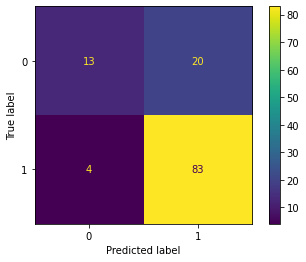

In [136]:
cm = confusion_matrix( y_test, predicted_y, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()